In [1]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [2]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
 
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
    #MSE.append(m)
    #SSIM.append(s)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()

In [ ]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("results/042912A1_real_B.png")
output = cv2.imread("results/042912A1_fake_B.png")
 
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

In [ ]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Output", output)
 
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 2, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
# show the figure
plt.show()
# compare the images
#compare_images(original, original, "Original vs. Original")
compare_images(original, output, "Original vs. Output")

In [ ]:
image3 = cv2.subtract(output,original)
plt.imshow(image3, cmap = plt.cm.gray)
plt.title("Difference")
plt.show()

In [ ]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2

mypath='results'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )

In [ ]:
plt.imshow(images[1])
plt.show()

In [ ]:
import cv2
import glob

images = [cv2.imread(file) for file in glob.glob('Real/*.png')]
images2 = [cv2.imread(file) for file in glob.glob('fake/*.png')]

In [ ]:
plt.imshow(images[1])
plt.show()

In [ ]:
plt.imshow(images2[46])
plt.show()

In [ ]:
print(MSE)
print(SSIM)

In [ ]:
#MSE.pop(-1)
#SSIM.pop(-1)

In [17]:
print(len(MSE))
print(len(SSIM))
x=list(range(0,50))

0
0


In [ ]:
plt.scatter(x,MSE)
plt.title("MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))
print(MSE.index(538.8857879638672))

In [ ]:
plt.scatter(x,SSIM)
plt.title("SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))
print(SSIM.index(0.6739305878492471))

In [ ]:
from sklearn.metrics import confusion_matrix
y_actu = original
y_pred = output
confusion_matrix(y_actu, y_pred)

# Evaluation Run 1

In [ ]:
run1R = []
for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/B/*B1.png')):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [ ]:
run1F = []
for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/F/*B.png')):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [ ]:
print(len(run1F))
print(len(run1R))

In [ ]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

In [ ]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [ ]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [ ]:
print(MSE)

In [ ]:
print(SSIM)

In [ ]:
x1=list(range(0,49))

In [ ]:
plt.scatter(x1,MSE,c='black')
plt.title("OLD MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

In [ ]:
plt.scatter(x1,SSIM,c='black')
plt.title("OLD SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

# Evaluation Run 2

In [3]:
from PIL import Image
import glob
image_listA1 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/images/*real_B.png')):
    im=Image.open(filename).convert('L')
    image_listA1.append(im)

In [4]:
image_listA2 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/images/*fake_B.png')):
    im=Image.open(filename).convert('L')
    image_listA2.append(im)

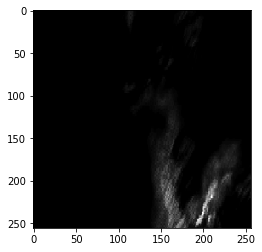

In [5]:
plt.imshow(np.array(image_listA1[0]),cmap='gray')
plt.show()

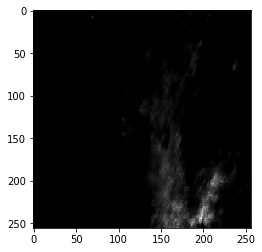

In [6]:
plt.imshow(np.array(image_listA2[0]),cmap='gray')
plt.show()

In [7]:
th1 = cv2.threshold(np.array(image_listA1[0]),1,255,cv2.THRESH_BINARY)
th2 = cv2.threshold(np.array(image_listA2[0]),1,255,cv2.THRESH_BINARY)

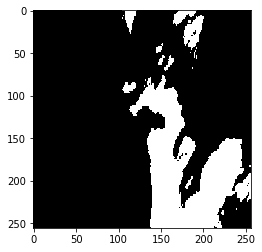

In [8]:
plt.imshow(th1[1],cmap = 'gray')
plt.show()

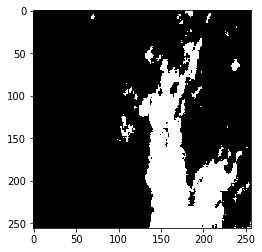

In [9]:
plt.imshow(th2[1],cmap = 'gray')
plt.show()

In [10]:
print(np.array(image_listA1[1]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
mse(np.array(image_listA1[0]),np.array(image_listA2[0]))

131.75535583496094

In [12]:
ssim(np.array(image_listA1[0]),np.array(image_listA2[0]))

0.8104632798835872

In [13]:
MSE1 = []
SSIM1 = []
for i in range(len(image_listA1)):
    m = mse(np.array(image_listA1[i]),np.array(image_listA2[i]))
    s = ssim(np.array(image_listA1[i]),np.array(image_listA2[i]))
    MSE1.append(m)
    SSIM1.append(s)

In [14]:
print(MSE1)

[131.75535583496094, 128.32083129882812, 69.33480834960938, 114.59130859375, 89.13592529296875, 67.87240600585938, 57.55235290527344, 171.2384033203125, 97.76322937011719, 237.75119018554688, 104.62367248535156, 131.8997039794922, 253.30491638183594, 336.6425323486328, 70.82469177246094, 123.17013549804688, 234.21791076660156, 236.73719787597656, 91.84942626953125, 180.93370056152344, 145.58056640625, 121.31417846679688, 187.21107482910156, 133.6106719970703, 67.7845458984375, 139.74612426757812, 194.86944580078125, 108.96170043945312, 240.7487335205078, 220.95169067382812, 44.23155212402344, 93.37855529785156, 48.247711181640625, 95.86820983886719, 90.55743408203125, 54.49314880371094, 54.97406005859375, 132.14451599121094, 266.36192321777344, 83.51454162597656, 76.66363525390625, 64.85169982910156, 76.46852111816406, 53.82099914550781, 80.19471740722656, 78.26194763183594, 87.31692504882812, 95.97132873535156, 70.13563537597656, 66.52210998535156]


In [15]:
print(SSIM1)

[0.8104632798835872, 0.8535117162736573, 0.8855115975865853, 0.8902430992358322, 0.9394917365097974, 0.9242491567038903, 0.8768515333824127, 0.812580623912952, 0.8188276059137682, 0.8175244177886716, 0.8259112337374741, 0.9047978671128555, 0.8406196460999114, 0.7837364807633057, 0.9320692566585123, 0.8405247960556614, 0.8325131697646739, 0.8595529478034779, 0.884856592903737, 0.896809996149835, 0.9052669709922877, 0.9399207618331472, 0.9421902335477637, 0.877513221454988, 0.9070514138059843, 0.8810404579129129, 0.868186609744865, 0.8670870723501989, 0.9384512278235828, 0.927817415600871, 0.9374138185184946, 0.8475335835687211, 0.9381923930180402, 0.8765649212393849, 0.864082187428482, 0.8588142928774155, 0.8510165640971319, 0.8850354822783771, 0.8102374331864155, 0.8858675543254779, 0.8914394526780313, 0.8966355385214372, 0.8789174327734545, 0.8250067113762914, 0.826033005532922, 0.8464971360475726, 0.8599425514481859, 0.8224819375393518, 0.8516684189670409, 0.8739519403777976]


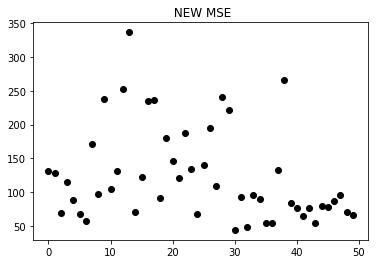

44.23155212402344 336.6425323486328
124.08555206298828


In [18]:
plt.scatter(x,MSE1,c='black')
plt.title(" NEW MSE")
plt.show()
print(min(MSE1),max(MSE1))
print(np.mean(MSE1))

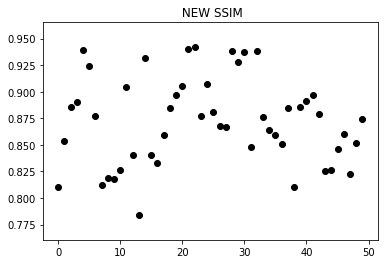

0.7837364807633057 0.9421902335477637
0.8722500899021446


In [19]:
plt.scatter(x,SSIM1,c='black')
plt.title(" NEW SSIM")
plt.show()
print(min(SSIM1),max(SSIM1))
print(np.mean(SSIM1))

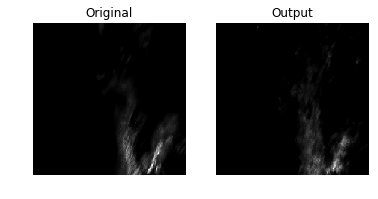

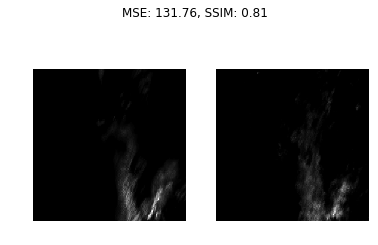

In [20]:
original = np.array(image_listA1[0])
output = np.array(image_listA2[0])
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Output", output)
 
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 2, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
# show the figure
plt.show()
# compare the images
#compare_images(original, original, "Original vs. Original")
compare_images(original, output, "Original vs. Output")

# Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
PTC = []

In [23]:
Fthr = []
Fthf = []
for i in range(len(image_listA1)):
    gray_img= np.array(image_listA1[i])
    gray_img2= np.array(image_listA2[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [ ]:
plt.imshow(Thr[0][1],cmap = 'gray')
plt.show()

In [ ]:
plt.imshow(Thf[0][1],cmap = 'gray')
plt.show()

In [ ]:
Fthr = []
Fthf = []
for i in range(len(Thr)):
    Fr = list(Thr[i][1].flatten())
    Ff = list(Thf[i][1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [25]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [ ]:
print(Fthr[1])

In [27]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [28]:
Total = TN+FP+FN+TP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100

In [29]:
PTC.append([PTN,PFP,PFN,PTP])

In [30]:
print(len(PTC))
print(PTC)

1
[[85.84814453125, 4.39202880859375, 2.864288330078125, 6.895538330078126]]


In [31]:
print("            ", "True-", "False+", "False-", "True+")
print("Old run:   ", 2829160, 87329, 141761, 153014)
print("New run:   ",TN,FP,FN,TP)
print("Difference: ",TN-2829160, FP-87329, FN-141761, TP-153014)

             True- False+ False- True+
Old run:    2829160 87329 141761 153014
New run:    2813072 143918 93857 225953
Difference:  -16088 56589 -47904 72939


Old run:    2829160 87329 141761 153014
New run:    2813072 143918 93857 225953
Difference:  -16088 56589 -47904 72939

In [ ]:
Fthr1 = []
Fthf1 = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr1.append(Fr)
    Fthf1.append(Ff)

In [ ]:
for i in range(len(Fthr1)):
    tn,fp,fn,tp=confusion_matrix(Fthr1[i], Fthf1[i]).ravel()
    TN1 = TN1 +tn
    FP1 = FP1 +fp
    FN1 = FN1 +fn
    TP1 = TP1 +tp

In [ ]:
print("             ", "TN", "   ", "FP","   ", "FN","   ", "TP")
print("Old run:    ",TN1,FP1,FN1,TP1)
print("New run:    ",TN,FP,FN,TP)
print("Difference: ",TN-TN1, FP-FP1, FN-FN1, TP-TP1)

In [ ]:
Total = TN+FP+FN+TP
Total1 = TN1+FP1+FN1+TP1

In [ ]:
print("Old run %:    ",(TN1/Total1)*100,(FP1/Total1)*100,(FN1/Total1)*100,(TP1/Total1)*100)
print("New run %:    ",(TN/Total)*100,(FP/Total)*100,(FN/Total)*100,(TP/Total)*100)

In [ ]:
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100

In [ ]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

In [ ]:
PTN1 = (TN1/Total1)*100
PFP1 = (FP1/Total1)*100
PFN1 = (FN1/Total1)*100
PTP1 = (TP1/Total1)*100

In [ ]:
Correct = PTN1 + PTP1
Wrong = PFN1 + PFP1
print("Correct = ", Correct, " Wrong = ", Wrong)

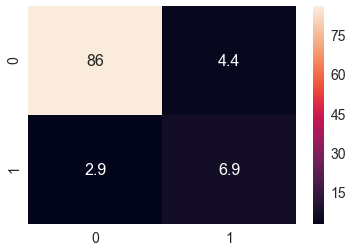

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [35]:
NF = FN+TN
NP = FP+TP
NPTN = (TN/NF)
NPFP = (FP/NF)
NPFN = (FN/NP)
NPTP = (TP/NP)

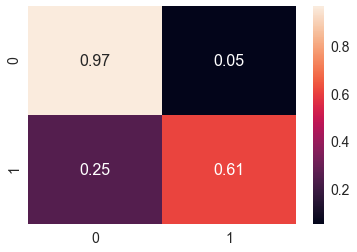

In [36]:
array = [[NPTN,NPFP],[NPFN,NPTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

# Comparing Different Thresholds with LR

In [1]:
TCPP = [[85.84814453125, 4.39202880859375, 2.864288330078125, 6.895538330078126], [86.70901489257812, 3.9813537597656246, 2.861907958984375, 6.447723388671875], [87.17013549804688, 3.520233154296875, 3.082977294921875, 6.226654052734375], [88.06210327148438, 3.439117431640625, 2.771484375, 5.727294921875], [88.62521362304688, 3.253204345703125, 2.715911865234375, 5.405670166015625], [89.13287353515625, 3.08544921875, 2.668548583984375, 5.113128662109375], [89.60699462890625, 2.93841552734375, 2.626373291015625, 4.828216552734375], [89.8526611328125, 2.6927490234375, 2.77191162109375, 4.68267822265625], [90.45684814453125, 2.6883544921875, 2.536834716796875, 4.317962646484375], [90.84359741210938, 2.57342529296875, 2.496368408203125, 4.08660888671875], [91.20303344726562, 2.474822998046875, 2.45184326171875, 3.87030029296875], [91.54550170898438, 2.37628173828125, 2.41009521484375, 3.668121337890625], [91.72515869140625, 2.196624755859375, 2.51611328125, 3.562103271484375], [92.17974853515625, 2.197845458984375, 2.328033447265625, 3.29437255859375], [92.46575927734375, 2.1187744140625, 2.297088623046875, 3.118377685546875], [92.73428344726562, 2.044921875, 2.269195556640625, 2.95159912109375], [92.98776245117188, 1.971343994140625, 2.246856689453125, 2.794036865234375], [93.23687744140625, 1.89654541015625, 2.214019775390625, 2.652557373046875], [93.47384643554688, 1.824249267578125, 2.186004638671875, 2.515899658203125], [93.69772338867188, 1.7602539062499998, 2.15740966796875, 2.384613037109375]]
TCPL = [[46.0174560546875, 0.6744384765625, 49.2950439453125, 4.0130615234375], [52.84881591796875, 0.848388671875, 42.81463623046875, 3.4881591796875], [59.332275390625, 1.02386474609375, 36.61956787109375, 3.0242919921875], [65.17791748046875, 1.18560791015625, 31.02264404296875, 2.61383056640625], [71.36077880859375, 1.318359375, 25.0396728515625, 2.28118896484375], [79.28466796875, 1.49688720703125, 17.3004150390625, 1.91802978515625], [87.37335205078125, 1.678466796875, 9.3994140625, 1.54876708984375], [91.62445068359375, 1.7181396484375, 5.32379150390625, 1.3336181640625], [94.44580078125, 1.69677734375, 2.6519775390625, 1.2054443359375], [94.90966796875, 1.70745849609375, 2.29339599609375, 1.0894775390625], [95.2911376953125, 1.7425537109375, 2.0263671875, 0.93994140625], [95.68328857421875, 1.76849365234375, 1.727294921875, 0.8209228515625], [96.1212158203125, 1.80816650390625, 1.3702392578125, 0.70037841796875], [96.58050537109375, 1.87835693359375, 0.9674072265625, 0.57373046875], [97.01385498046875, 1.89666748046875, 0.62255859375, 0.4669189453125], [97.247314453125, 1.9439697265625, 0.4486083984375, 0.360107421875], [97.503662109375, 1.97601318359375, 0.28076171875, 0.23956298828125], [97.66082763671875, 2.03094482421875, 0.1800537109375, 0.128173828125], [97.79510498046875, 2.0233154296875, 0.11444091796875, 0.067138671875], [97.90191650390625, 1.99737548828125, 0.0732421875, 0.0274658203125]]

In [ ]:
print(len(TCPP))
print(len(TCPL))

In [3]:
TCWP = []
TCWL = []
for i in range(20):
    Correct, Wrong, Correct1, Wrong1 = 0,0,0,0
    Correct = TCPP[i][0]+TCPP[i][3]
    Wrong   = TCPP[i][1]+TCPP[i][2]
    Correct1= TCPL[i][0]+TCPL[i][3]
    Wrong1  = TCPL[i][1]+TCPL[i][2]
    TCWP.append([Correct,Wrong])
    TCWL.append([Correct1,Wrong1])

In [ ]:
print(TCWP)

In [ ]:
print(TCWL)

In [11]:
YP = []
YL = []
for i in range(16):
    YP.append(TCWP[i][0])
    YL.append(TCWL[i][0])
x=list(range(1,17))    
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


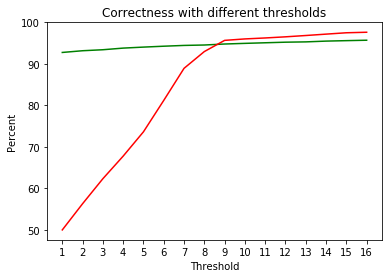

In [12]:
plt.plot(x,YP,'G')
plt.plot(x,YL,'R')
plt.xlabel('Threshold')
plt.ylabel('Percent')
plt.title('Correctness with different thresholds')
plt.xticks(np.arange(1, 17, step=1))
plt.show()